# Solar Power Data Exploration
### This notebook aims to create predictive models for Solar Generation based on the data prepared in the data exploraration notebook.
#### By Elliot Taylor

In [175]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [163]:
#Load prepared data and split into X array of feature variables and y array of targets
df = pd.read_csv("Data/PreparedData.csv")
feature_list = ["Temp", "Rad_Direct","Rad_Diffuse","Load_Actual","Load_Forecast","Price_Day_Ahead","Solar_Cap"]
target = ["Solar_Gen"]
X = df[feature_list].to_numpy()
y = df[target].to_numpy()

In [165]:
#Confirm the shape of each array fits.
print(X.shape)
print(y.shape)

(17495, 7)
(17495, 1)


In [167]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11721, 7) (11721, 1)
Test set: (5774, 7) (5774, 1)


## Linear Model

In [169]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
y_hat = regr.predict(X_test)

In [213]:
print("MSE: ", mean_squared_error(y_test,y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))
print("R2 score: ", r2_score(y_test, y_hat))

MSE:  0.0030830110241513524
MAE:  0.03798778445533097
R2 score:  0.9302684113991384


In [171]:
residuals = y_test - y_hat

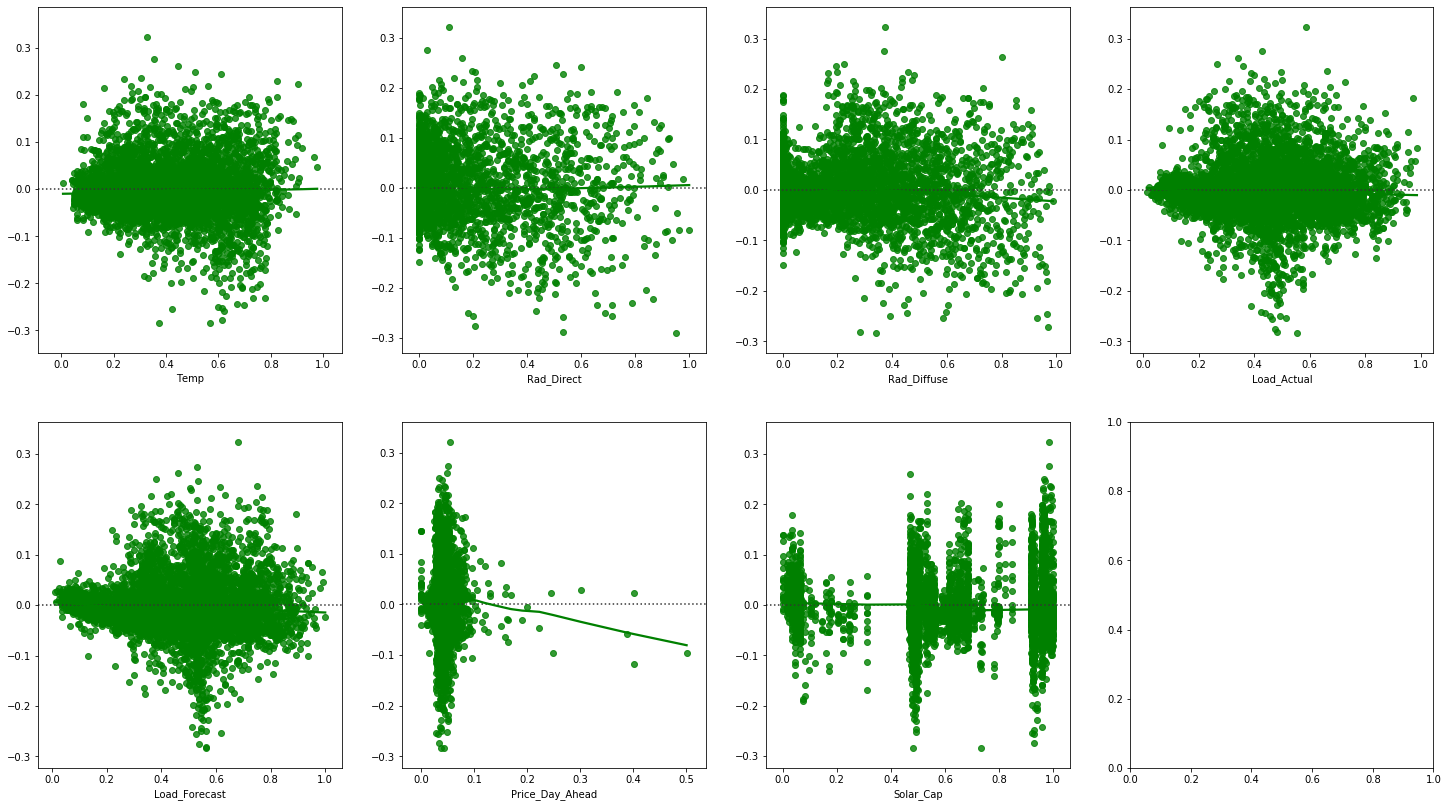

In [172]:
i = 0
j = 0
k = 0

fig, ax = plt.subplots(ncols=4,nrows=2)

for i in range(7):
    if i % 4 == 0 and i != 0:
        k = 1
        j = 0
    sns.residplot(x=X_test[:,i].reshape(1,-1), y=residuals, lowess=True, color="g", ax=ax[k,j])
    ax[k,j].set_xlabel(feature_list[i]) 
    fig.set_size_inches(25,14)
    j = j + 1

plt.savefig("Images/residuals.png", bbox_inches='tight')

In [191]:
CVscores = cross_val_score(regr, X, y, cv=15, scoring = "neg_mean_absolute_error")
print("MAE: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))
CVscores = cross_val_score(regr, X, y, cv=15, scoring = "neg_root_mean_squared_error")
print("RMSE: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))
CVscores = cross_val_score(regr, X, y, cv=15, scoring = "r2")
print("Rsquared: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))

MAE: -0.04 (+/- 0.01)
RMSE: -0.06 (+/- 0.02)
Rsquared: 0.88 (+/- 0.15)


## Random Forest

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
regrF = RandomForestRegressor(max_depth=2, random_state=0)
regrF.fit(X_train, y_train)
y_hatF = regrF.predict(X_test)

In [226]:
CVscores = cross_val_score(regrF, X, y, cv=15, scoring = "neg_mean_absolute_error")
print("MAE: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))
CVscores = cross_val_score(regrF, X, y, cv=15, scoring = "neg_root_mean_squared_error")
print("RMSE: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))
CVscores = cross_val_score(regrF, X, y, cv=15, scoring = "r2")
print("Rsquared: %0.2f (+/- %0.2f)" % (CVscores.mean(), CVscores.std() * 2))

MAE: -0.06 (+/- 0.02)
RMSE: -0.08 (+/- 0.03)
Rsquared: 0.78 (+/- 0.22)


In [218]:
MSE = []
MAE = []
Rsquared = []

for i in range(1,25):
    regrF = RandomForestRegressor(max_depth=i, random_state=0)
    regrF.fit(X_train, y_train)
    y_hatF = regrF.predict(X_test)
    MSE.append(mean_squared_error(y_test,y_hatF))
    MAE.append(mean_absolute_error(y_test, y_hatF))
    Rsquared.append(r2_score(y_test, y_hatF))

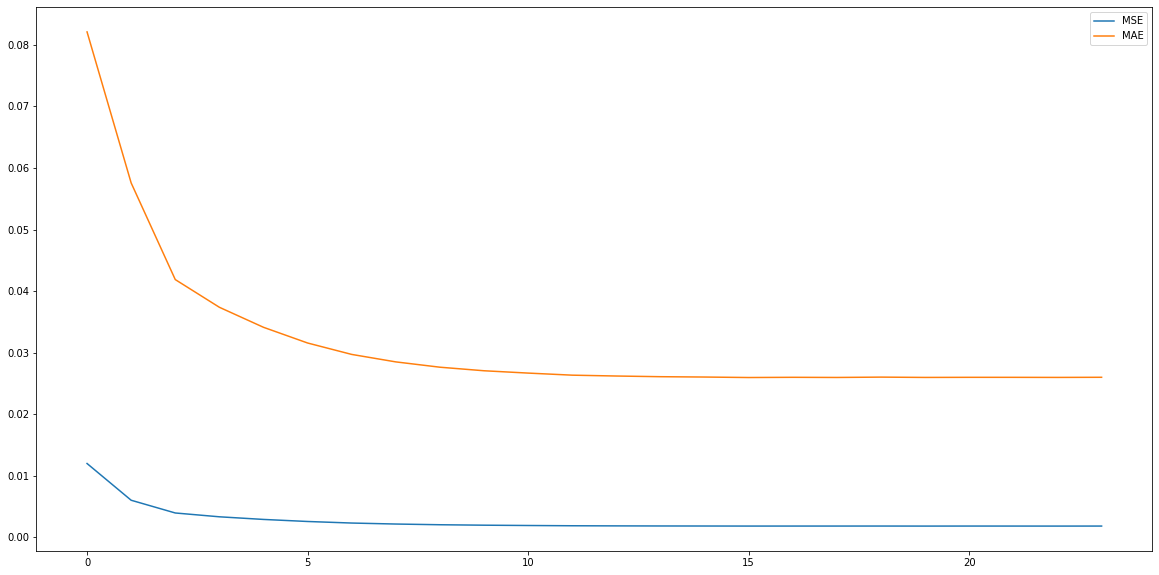

In [229]:
plt.figure(figsize=(20,10))
plt.plot(MSE)
plt.plot(MAE)
plt.legend(['MSE', 'MAE'])

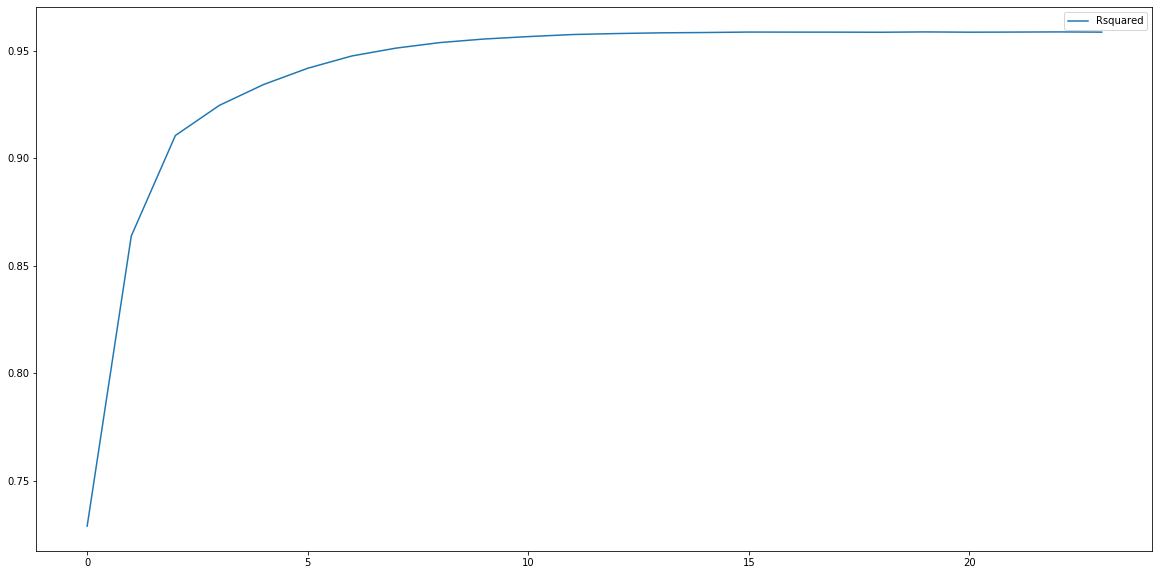

In [230]:
plt.figure(figsize=(20,10))
plt.plot(Rsquared)
plt.legend(['Rsquared'])

In [231]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [232]:
#rf = RandomForestRegressor()

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#rf_random.fit(X_train, y_train)

#print(rf_random.best_params_)
#{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.2min finished
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [241]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    MSE = mean_squared_error(test_labels, predictions)
    MAE = mean_absolute_error(test_labels, predictions)
    R2 = r2_score(test_labels, predictions)
    print("Model performance:")
    print("MSE: ", MSE)
    print("MAE: ", MAE)
    print("R2 score: ", R2)
    
    return MSE, MAE, R2

base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_MSE, base_MAE, base_R2 = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
random_MSE, random_MAE, random_R2 = evaluate(best_random, X_test, y_test)

print("Model Improvements:")
print('MSE Improvement of: {:0.2f}%.'.format(100 * (base_MSE - random_MSE) / base_MSE))
print('MAE Improvement of: {:0.2f}%.'.format(100 * (base_MAE - random_MAE) / base_MAE))
print('R2 Improvement of: {:0.2f}%.'.format(100 * (random_R2 - base_R2) / base_R2))

Model performance:
MSE:  0.0018329573315869216
MAE:  0.02600273367069544
R2 score:  0.9585421441675398
Model performance:
MSE:  0.0016441968071307957
MAE:  0.024960691647797656
R2 score:  0.9628115324805707
Model Improvements:
MSE Improvement of: 10.30%.
MAE Improvement of: 4.01%.
R2 Improvement of: 0.45%.
